2)Advanced Simulation using Tensor multiplication

Importing all necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

Declaring all qubit operations and |0> qubit state as arrays

In [4]:
I=np.array([[1,0],[0,1]])
X=np.array([[0,1],[1,0]])
H=np.array([[1/(2**0.5),1/(2**0.5)],[1/(2**0.5),-1/(2**0.5)]])
CNOT=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
q0=([1,0])


Implementation of circuit to sequentially implement quantum gates on the quantum state vector

The circuit consists of: 
1)Applying the Hadamard operator to the second qubit 
2)Applying the CNOT operator to the first two qubits keeping the second and first qubits as control and target respectively 
3)Applying the X gate to all remaining qubits

In [9]:
def ckt_sim(n):
    # Initialize the state as |0> tensor |0> ... tensor |0>
    # Start with q0 and use np.kron to create the n-qubit |00...0> state
    state = q0
    
    j=2
    while(j<=n):
        state=np.kron(q0,state)
        j=j+1
        
    # Reshape state to an n-dimensional tensor of shape (2, 2, ..., 2)
    state = np.reshape(state, (2,) * n)

    # Applying Hadamard to the second qubit (q1)
    
    if n > 1:
        state = np.tensordot(H, state, axes=([1], [n-2]))  # Apply H to the second qubit
        state = np.moveaxis(state, 0, n-2)  # Move axis to last for correct dimensional alignment

    # Applying CNOT with q1 as control and q0 as target
    
    op = np.reshape(CNOT, (2, 2, 2, 2))
    if n > 1:
        # CNOT acts on the first two qubits
        state = np.tensordot(op, state, axes=([2, 3], [n-2, n-1]))   # Apply CNOT to first two qubits where the second qubit is the control
        state = np.moveaxis(state,[0,1],[n-2, n-1])  # Re-align dimensions if necessary

    # Applying X gate to remaining qubits q2, q3, ..., q(n-1) , i.e; from the third qubit and onwards
    
    if n > 2:
        k=3
        while(k<=n):  
            state=np.tensordot(X, state, axes=([1], [n-k]))
            state=np.moveaxis(state, 0, n-k)  # Re-align axis i after each application
            k=k+1

    # Flatten the state to get back the state vector in 2^n-dimensional space
    state = np.reshape(state, (2 ** n,))
    

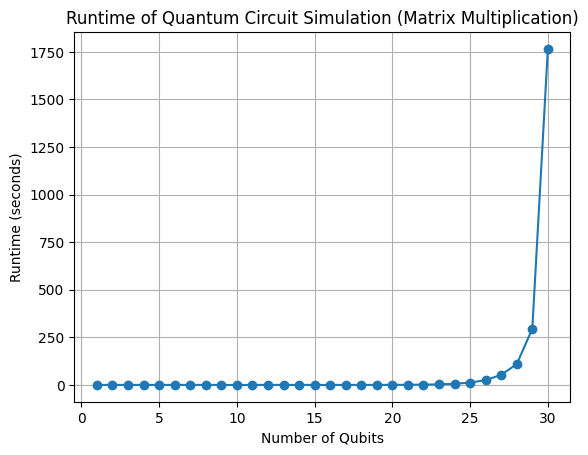

In [8]:
qubit_count=range(1,31)
runtimes=[]

for x in qubit_count:
    start_time=time.time()
    ckt_sim(x)
    end_time=time.time()
    runtimes.append(end_time-start_time)

plt.plot(qubit_count, runtimes, marker='o')
plt.title("Runtime of Quantum Circuit Simulation (Matrix Multiplication)")
plt.xlabel("Number of Qubits")
plt.ylabel("Runtime (seconds)")
plt.grid()
plt.show()   

Using this method,I was able to simulate 30 qubits. Further increasing the number of qubits would cause the runtime to increase to an impractical amount. The plot shows an exponential increase in runtime as we increase the number of qubits. We observe that using this method we could simulate two times the number of qubits as compared to the method  used in subtask 1. We can conclude that simulation using tensor multiplication is more efficient and optimal